In [1076]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [1093]:
img=cv2.imread("Images/img1.jpeg")
# img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# img=cv2.resize(img,(400,300))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=img[300:,:]

In [1094]:
img=cv2.resize(img,(600,300))

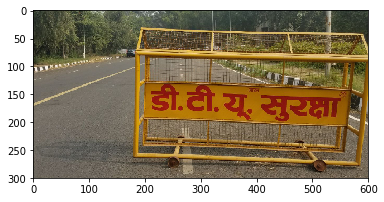

In [1095]:
plt.imshow(img)
plt.show()

In [1080]:
hsv_img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
hsv_img_blur=cv2.GaussianBlur(hsv_img,(3,3),0)

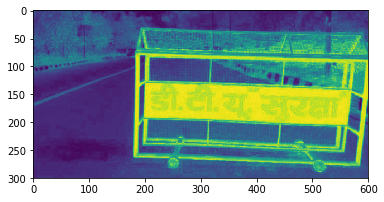

In [1081]:
plt.imshow(hsv_img_blur[:,:,1])
plt.show()

In [1082]:
hsv_s=hsv_img_blur[:,:,1]

In [1083]:
ret,binary_hsv_global = cv2.threshold(hsv_s,210,255,cv2.THRESH_BINARY)

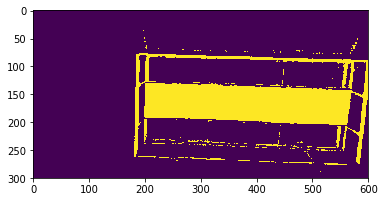

In [1084]:
plt.imshow(binary_hsv_global)
plt.show()

In [1085]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# opening_hsv = cv2.morphologyEx(binary_hsv_global, cv2.MORPH_OPEN, kernel)
# opening_hsv_blur=cv2.GaussianBlur(opening_hsv,(3,3),0)
dilate_hsv = cv2.dilate(binary_hsv_global,kernel,iterations = 1)

In [1086]:
# cv2.imshow("rjnf4f",dilate_hsv)
# cv2.waitKey(1000)
# cv2.destroyAllWindows()

In [1087]:
dilate_hsv_Gaussian=cv2.GaussianBlur(dilate_hsv,(3,3),0)

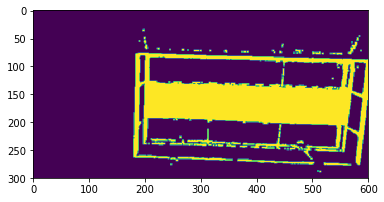

In [1088]:
plt.imshow(dilate_hsv_Gaussian)
plt.show()

In [1089]:
_,contours, hierarchy = cv2.findContours(dilate_hsv_median,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt=contours[max_index]

In [1090]:
x,y,w,h = cv2.boundingRect(cnt)

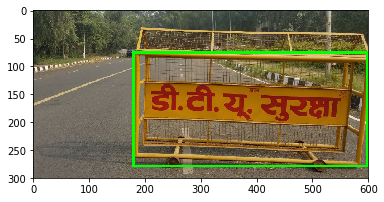

In [1092]:
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
# cv2.imshow("Show",img)
plt.imshow(img)
plt.show()

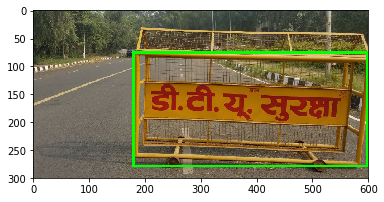

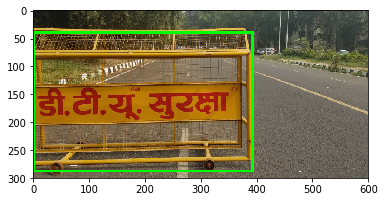

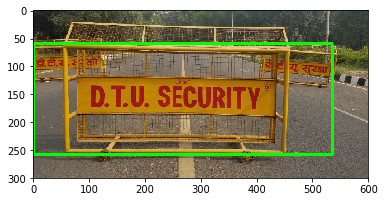

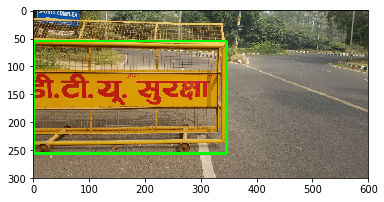

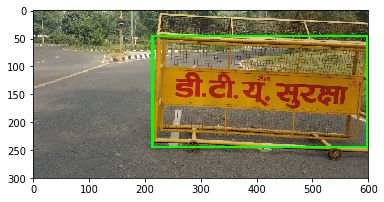

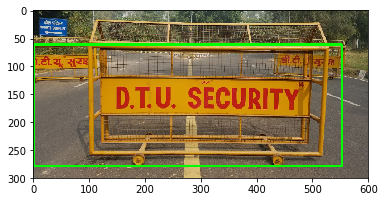

In [1096]:
for i in range(6):
#     Reading Images
    img=cv2.imread("Images/img"+str(i+1)+".jpeg")
#     Converting BGR TO RGB channel
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     Cropping out the desired region of interest
    img=img[300:,:]
#     Resizing Images
    img=cv2.resize(img,(600,300))
#     Converting to HSV images
    hsv_img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    
#     Gaussian smoothing
    hsv_img_blur=cv2.GaussianBlur(hsv_img,(3,3),0)
#     Using saturation channel of the image
    hsv_s=hsv_img_blur[:,:,1]
#     Thresholding Image to extract the desired saturated(intensity) pixels
    ret,binary_hsv_global = cv2.threshold(hsv_s,210,255,cv2.THRESH_BINARY)
    
    
    
    # a=np.zeros((20, 20))
    # for i in range(a.shape[0]):
    #     for j in range(a.shape[1]):
    #         a[i][j]=210
    # copy=binary_hsv_global.copy()
    # for i in range(0,binary_hsv_global.shape[0]-20,20):
    #     for j in range(0,binary_hsv_global.shape[1]-20,20):
    #         t=(binary_hsv_global[i:i+20,j:j+20]>=a)
    #         if(np.count_nonzero(t)>250):
    #             copy[i:i+30,j:j+30]=0
    

    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    # opening_hsv = cv2.morphologyEx(binary_hsv_global, cv2.MORPH_OPEN, kernel)
    # opening_hsv_blur=cv2.GaussianBlur(opening_hsv,(3,3),0)
    
#     Dilating images to help contouring
    dilate_hsv = cv2.dilate(binary_hsv_global,kernel,iterations = 1)
    # erode_hsv= cv2.erode(binary_hsv_global,kernel,iterations = 1)
    
#     Gaussian Smoothing
    dilate_hsv_Gaussian=cv2.GaussianBlur(dilate_hsv,(3,3),0)
    
#     building contours
    _,contours, hierarchy = cv2.findContours(dilate_hsv_Gaussian,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     building areas of contours
    areas = [cv2.contourArea(c) for c in contours]
#     extracting out the contours with maximum area
    max_index = np.argmax(areas)
    cnt=contours[max_index]
#     building bounding rectangles
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
    plt.imshow(img)
    plt.show()